In [1]:
import numpy as np
import pandas as pd


In [2]:
#!pip install plotly

In [3]:
df= pd.read_csv("supply_chain.csv")
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [4]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go 
pio.templates.default = "plotly_white"

# Now let's get started with analyzing the supply chain by looking at the relationship between the price of the products and the revenue generated by them :

In [5]:
#!pip install statsmodels

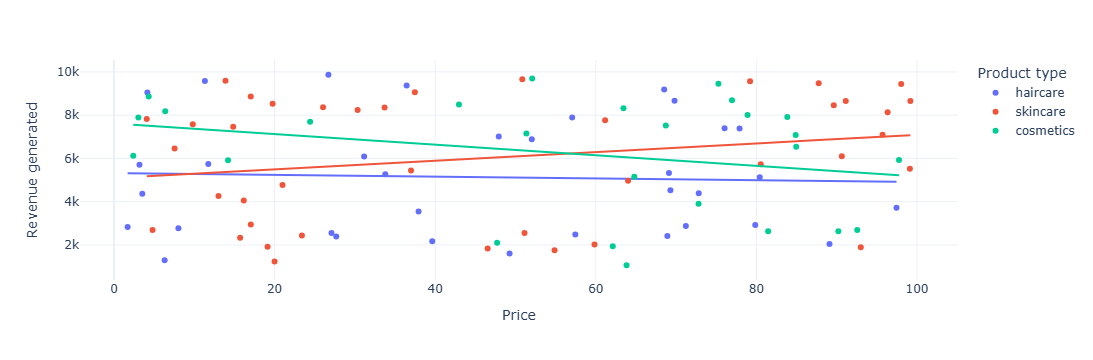

In [6]:
fig = px.scatter(df,x='Price',
                 y='Revenue generated',
                 color='Product type',
                 hover_data=[ 'Number of products sold'],
                 trendline="ols")
fig.show()

In [7]:
sales_data = df.groupby('Product type')['Number of products sold'].sum().reset_index()
sales_data

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


In [8]:
pie_chart = px.pie(sales_data, values='Number of products sold',
                   names='Product type',
                   title='Sales by Product Type',
                   hover_data=['Number of products sold'],
                   hole=0.5,
                   color_discrete_sequence=px.colors.qualitative.Pastel)
pie_chart.show()

# So 45% of the business comes from skincare products,29.5% from haircare,and 25.5% from cosmetics. Now let's have a look at the revenue generated from shipping carriers:

In [9]:
total_revenue = df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue by Shipping Carrier',
                  xaxis_title='Shipping Carrier',
                  yaxis_title='Revenue Generated')
fig.show()

# So the company is using three carriers for transportation , and carrier B helps the company in generating more revenue . Now let's have a look at the Average lead time and average manufacturing costs for all products of the company: 

In [10]:
avg_lead_time = df.groupby('Product type') ['Lead time' ].mean().reset_index()
# avg_lead_time
avg_manufacturing_costs = df.groupby('Product type') ['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs,
                  on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time',
                        'Manufacturing costs': 'Average Manufacturing Costs'},
                inplace=True)

print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


# Analyzing SKUs
There's a column in the dataset as SKUs. You must have heard it for the very first time. So, SKU stands for Stock Keeping
Units. They're like special codes that help companies keep track of all the different things they have for sale. Imagine you have
a large toy store with lots of toys. Each toy is different and has its name and price, but when you want to know how many you
have left, you need a way to identify them. So you give each toy a unique code, like a secret number only the store knows.
This secret number is called SKU.

I hope you have now understood what's SKU. Now let's analyze the revenue generated by each SKU:

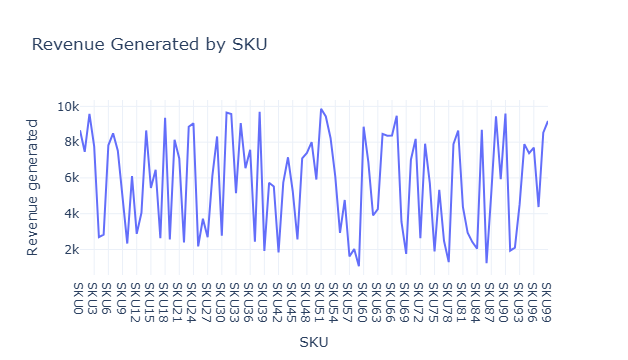

In [11]:
revenue_chart = px.line(df ,x='SKU',
                        y='Revenue generated',
                        title='Revenue Generated by SKU')
revenue_chart.show()

# There's another column in the dataset as Stock levels. Stock
levels refer to the number of products a store or business has
in its inventory. Now let's have a look at the stock levels of
each SKU:

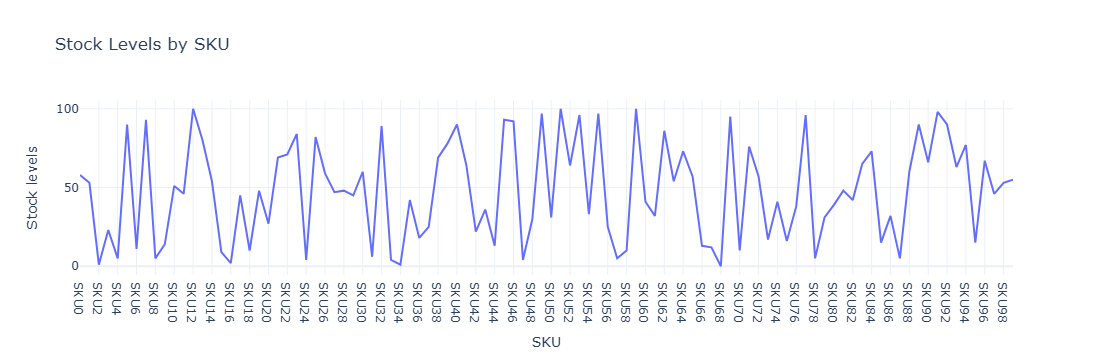

In [13]:
stock_chart = px.line(df, x='SKU',
            y='Stock levels',
            title='Stock Levels by SKU')

stock_chart.show()

# Now let's have a look at the order quantity of each SKU:

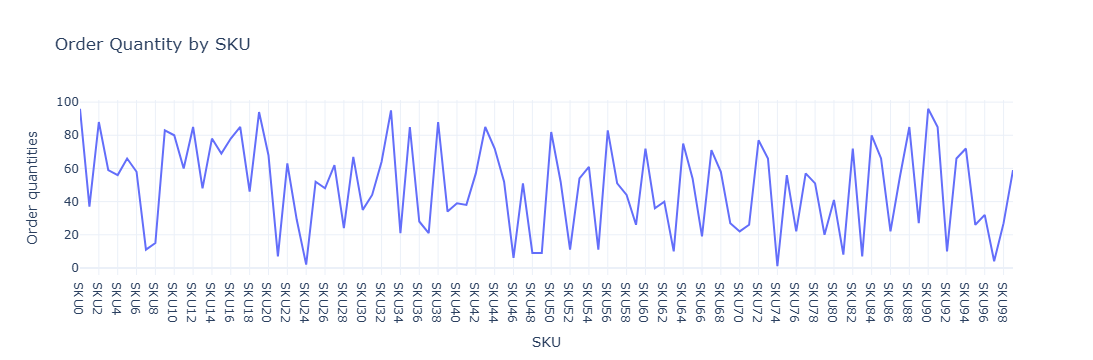

In [16]:
order_quantity_chart = px.line(df, x='SKU',
                        y='Order quantities',
                        title='Order Quantity by SKU')

order_quantity_chart.show()

# Cost Analysis

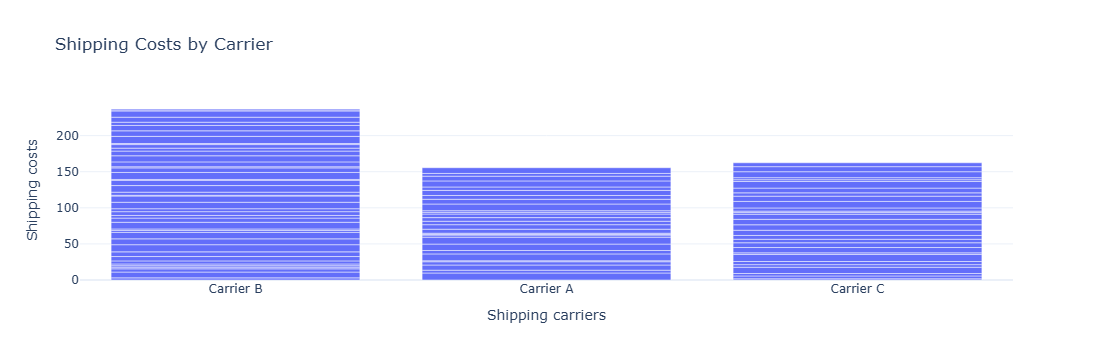

In [20]:
shipping_cost_chart = px.bar(df, x='Shipping carriers',
                                  y='Shipping costs',
                                 title='Shipping Costs by Carrier')

shipping_cost_chart.show()

# Now let's have a look at the cost distribution by transportation:

In [23]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [24]:
df.groupby('Transportation modes')['Costs'].mean().reset_index()

,Transportation modes,Costs
0,Air,561.712596
1,Rail,541.747556
2,Road,553.385988
3,Sea,417.819148


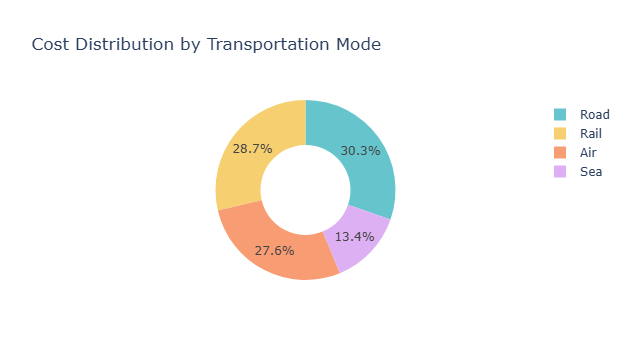

In [21]:
transportation_chart = px.pie(df,
                              values='Costs',
                              names='Transportation modes',
                              title='Cost Distribution by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=
                              px.colors.qualitative.Pastel)

transportation_chart.show()

# So the company spends more on Road and Rail modes of
#transportation for the transportation of Goods.
#Analyzing Defect Rate The defect rate in the supply chain refers to the percentage of products that have something wrong or
#are found broken after shipping. Let's have a look at the average defect rate of all product types:

In [26]:
defect_rates_by_product = df.groupby('Product type')['Defect rates'].mean().reset_index()

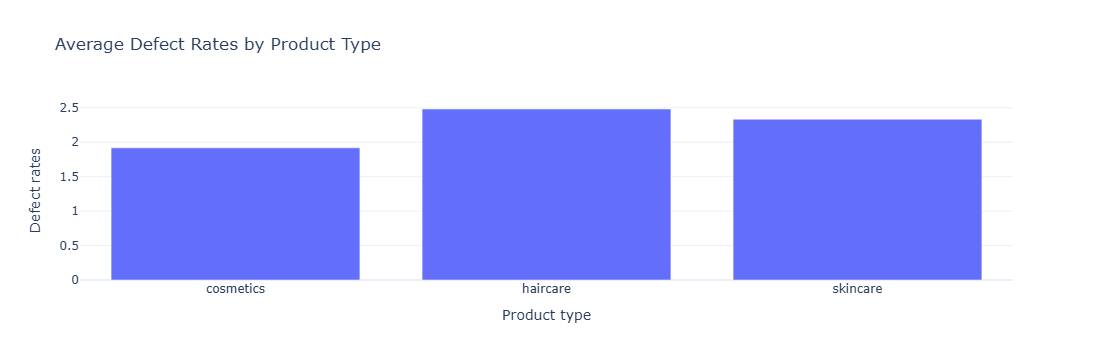

In [27]:

fig = px.bar(defect_rates_by_product, x='Product type',
                                     y='Defect rates',
                                    title='Average Defect Rates by Product Type')

fig.show()

# So the defect rate of haircare products is higher. Now let's
have a look at the defect rates by mode of transportation: 

In [40]:
df_3 = df.groupby('Transportation modes')['Defect rates'].sum(). reset_index()
df_3

,Transportation modes,Defect rates
0,Air,47.422012
1,Rail,64.926789
2,Road,76.007216
3,Sea,39.359782


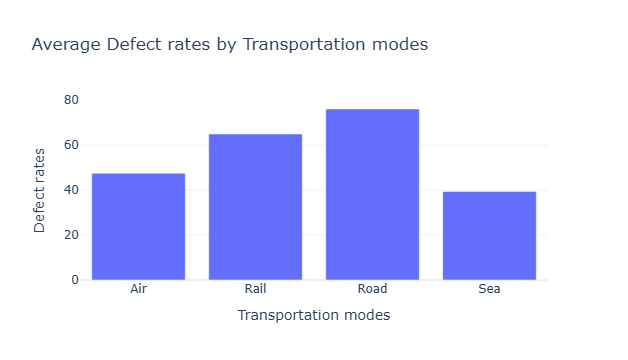

In [41]:
fig = px.bar(df_3,
            x = 'Transportation modes',
            y = 'Defect rates',
            title = 'Average Defect rates by Transportation modes')
fig.show()

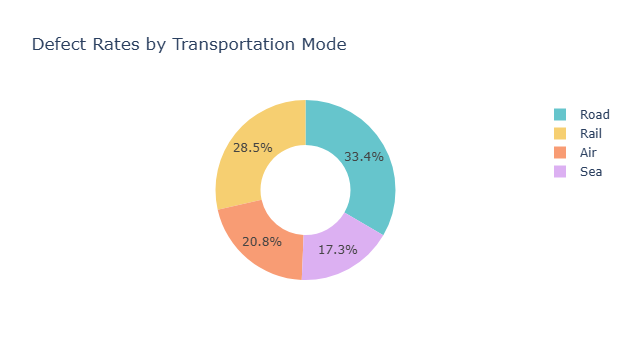

In [43]:
transportation_chart = px.pie(values=df_3["Defect rates"],
                              names=df_3['Transportation modes'],
                              title='Defect Rates by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=
                                px.colors.qualitative.Pastel)

transportation_chart.show()

In [44]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [45]:
df.head(3)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282


# Location wise Revenue generated

In [50]:
df_4 = df.groupby('Location')['Revenue generated'].sum().reset_index()
df_4

,Location,Revenue generated
0,Bangalore,102601.723882
1,Chennai,119142.815748
2,Delhi,81027.701225
3,Kolkata,137077.551005
4,Mumbai,137755.026877


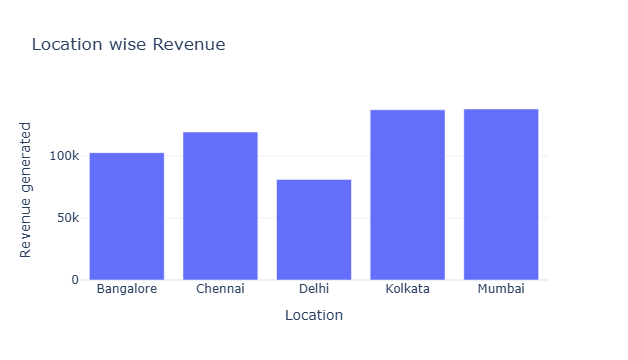

In [54]:
fig = px.bar(df_4,
             x = df_4['Location'],
             y = df_4['Revenue generated'],
             title = 'Location wise Revenue')
fig.show()